In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# location of file (Heart Disease)
path= data_source
# column=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
dataframe1=pd.read_csv(path)
dataframe1.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
# no. of null values
dataframe1.isnull().sum().sum()

0

In [4]:
# target class distribution
dataframe1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# Searching '?' in any row of dataframe1
dataframe1[dataframe1.eq('?').any(1)]

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [6]:
# Find min and max values
pd.DataFrame({'max':dataframe1.max(),'min':dataframe1.min(),'median':dataframe1.median()})

,max,min,median
age,77.0,29.0,55.0
sex,1.0,0.0,1.0
cp,3.0,0.0,1.0
trestbps,200.0,94.0,130.0
chol,564.0,126.0,240.0
fbs,1.0,0.0,0.0
restecg,2.0,0.0,1.0
thalach,202.0,71.0,153.0
exang,1.0,0.0,0.0
oldpeak,6.2,0.0,0.8


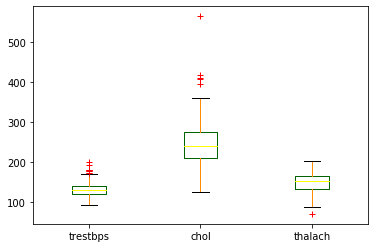

In [7]:
# to visualize the distribution of values within each column
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'Yellow', 'caps': 'Black'}
dataframe1[['trestbps','chol','thalach']].plot.box(color=color,sym='r+')

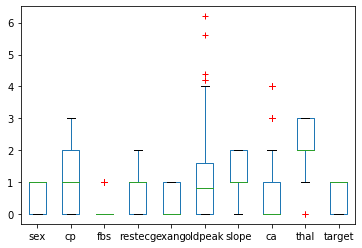

In [8]:
# to visualize the distribution of values within each column
dataframe1.drop(['trestbps','chol','thalach','age'],axis=1).plot.box(sym='r+')

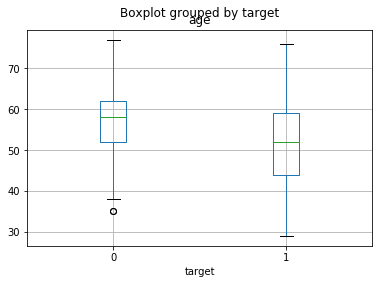

In [9]:
# variation of age for each value of target
dataframe1.boxplot(by='target',column='age')

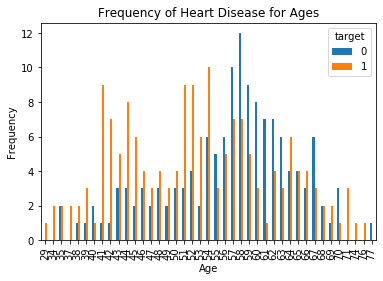

In [10]:
df=pd.crosstab(dataframe1.age,dataframe1.target)
df.plot(kind='bar')
plt.title('Frequency of Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

As we can see person with higher age has higher frequency of not heart disease in comparison of person with lower age.

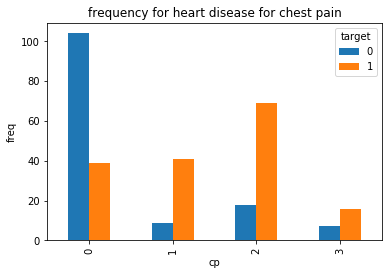

In [11]:
df1=pd.crosstab(dataframe1.cp,dataframe1.target).plot(kind='bar')
plt.title('frequency for heart disease for chest pain')
plt.xlabel('cp')
plt.ylabel('freq')
plt.show()

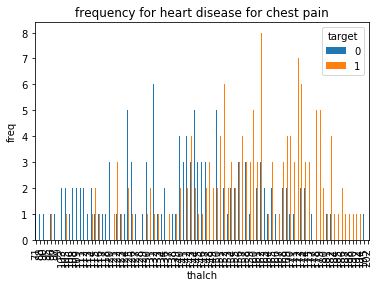

In [12]:
df2=pd.crosstab(dataframe1.thalach,dataframe1.target).plot(kind='bar')
plt.title('frequency for heart disease for chest pain')
plt.xlabel('thalch')
plt.ylabel('freq')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000115A9306C8>,
      dtype=object)

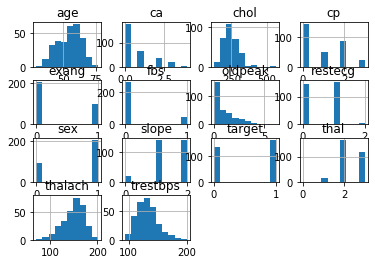

In [13]:
dataframe1.hist()

In [14]:
# encoding categories column
dataframe2=pd.get_dummies(dataframe1,columns=['cp','thal','slope'])
dataframe2.head(3)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1


In [15]:
X_data=dataframe2.drop('target',axis=1)
Y_data=dataframe2[['target']]

In [16]:
from sklearn.model_selection import train_test_split
X_data_train,X_data_test,Y_data_train,Y_data_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=41)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_data_train_values=mms.fit_transform(X_data_train)
X_data_test_values=mms.transform(X_data_test)

In [18]:
X_data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [19]:
X_train=pd.DataFrame(X_data_train_values,columns=X_data.columns)
X_train.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.581395,1.0,0.571429,0.196347,1.0,0.5,0.693548,0.0,0.258065,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.744186,1.0,0.673469,0.273973,0.0,0.5,0.395161,1.0,0.000000,0.75,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X_test=pd.DataFrame(X_data_test_values,columns=X_data.columns)
X_test.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.232558,1.0,0.265306,0.098174,0.0,0.5,0.588710,1.0,0.451613,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.813953,1.0,0.469388,0.292237,0.0,0.0,0.604839,0.0,0.322581,0.75,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
from sklearn.model_selection import GridSearchCV


def GET_Results(results):
    print('best params: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    all_params=results.cv_results_['params']
    for mean, std, params in zip(means,stds,all_params):
        print(round(mean,5),round(std*2,5),params)

from sklearn.tree import DecisionTreeClassifier 
 


## Decision Tree classifier

In [22]:
from sklearn.metrics import f1_score
def all_score(a_true,a_pred):
    print(f1_score(a_true,a_pred,average='binary'))

In [23]:
from scipy.stats import randint
dt=DecisionTreeClassifier(random_state=1)
parameters={"max_depth": [5,10,15,20,None],"min_samples_leaf":range(2, 9,1),"criterion": ["gini", "entropy"]}
dt_cv=GridSearchCV(dt,parameters, scoring='f1',cv=5)
dt_cv.fit(X_train,Y_data_train.values.ravel())  

GET_Results(dt_cv)

best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}

0.802 0.0977 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
0.79824 0.08161 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
0.78028 0.12806 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}
0.75105 0.13638 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.77684 0.11823 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}
0.78668 0.08558 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}
0.77764 0.06015 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}
0.77335 0.0924 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}
0.79362 0.0865 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3}
0.78028 0.12806 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4}
0.75105 0.13638 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
0.77684 0.11823 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf = 7)
dt_model.fit(X_train,Y_data_train.values.ravel())
dt_y_pred=dt_model.predict(X_test)
all_score(Y_data_test,dt_y_pred)

0.7457627118644068


## kNN classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()
parameters={'n_neighbors':[4,5,6,7,8,9],'p':[1,2]}
knn_cv=GridSearchCV(knn,parameters, cv=5,scoring='f1')
knn_cv.fit(X_train,Y_data_train.values.ravel())  

GET_Results(knn_cv)

best params: {'n_neighbors': 7, 'p': 1}

0.84098 0.08578 {'n_neighbors': 4, 'p': 1}
0.82111 0.10908 {'n_neighbors': 4, 'p': 2}
0.84173 0.08859 {'n_neighbors': 5, 'p': 1}
0.83948 0.12145 {'n_neighbors': 5, 'p': 2}
0.84277 0.10089 {'n_neighbors': 6, 'p': 1}
0.82582 0.08955 {'n_neighbors': 6, 'p': 2}
0.84523 0.11004 {'n_neighbors': 7, 'p': 1}
0.83011 0.08453 {'n_neighbors': 7, 'p': 2}
0.8286 0.10666 {'n_neighbors': 8, 'p': 1}
0.81728 0.08507 {'n_neighbors': 8, 'p': 2}
0.83864 0.10329 {'n_neighbors': 9, 'p': 1}
0.83195 0.07829 {'n_neighbors': 9, 'p': 2}


C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
knn_model=KNeighborsClassifier(n_neighbors= 7, p=1)
knn_model.fit(X_train,Y_data_train.values.ravel())
knn_y_pred=knn_model.predict(X_test)
all_score(Y_data_test,knn_y_pred)

0.8524590163934426


## Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
lr=LogisticRegression()
parameters={'C':[0.001,0.01,0.1,1,10,100]}
lr_cv=GridSearchCV(lr,parameters, cv=5,scoring='f1')
lr_cv.fit(X_train,Y_data_train.values.ravel())  

GET_Results(lr_cv)

best params: {'C': 1}

0.84364 0.0867 {'C': 0.001}
0.85941 0.0703 {'C': 0.01}
0.85927 0.01982 {'C': 0.1}
0.86071 0.06624 {'C': 1}
0.85744 0.06036 {'C': 10}
0.8541 0.05454 {'C': 100}


In [33]:
lr_model=LogisticRegression(C=0.01)
lr_model.fit(X_train,Y_data_train.values.ravel())
lr_y_pred=lr_model.predict(X_test)
all_score(Y_data_test,lr_y_pred)

0.8135593220338982


## Support Vector classifier

In [34]:
from sklearn.svm import SVC
svc=SVC()
parameters={'kernel':['linear','rbf'],'C':[0.1,1,10]}
svc_cv=GridSearchCV(svc,parameters, cv=5,scoring='f1')
svc_cv.fit(X_train,Y_data_train.values.ravel())  

GET_Results(svc_cv)

best params: {'C': 0.1, 'kernel': 'linear'}

0.86962 0.04173 {'C': 0.1, 'kernel': 'linear'}
0.85623 0.06636 {'C': 0.1, 'kernel': 'rbf'}
0.86615 0.09193 {'C': 1, 'kernel': 'linear'}
0.86857 0.04318 {'C': 1, 'kernel': 'rbf'}
0.85354 0.07024 {'C': 10, 'kernel': 'linear'}
0.86061 0.08941 {'C': 10, 'kernel': 'rbf'}


In [36]:
svc_model=SVC(C=1,kernel='rbf')
svc_model.fit(X_train,Y_data_train.values.ravel())
svc_y_pred=svc_model.predict(X_test)
all_score(Y_data_test,svc_y_pred)

0.7999999999999999
